In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# for air gas constant (J/Kg/K)
R = 287
# Sea level temprature (Kelvin)
T0 = 288.16
# Sea level density (Kg/m3)
rho0 = 1.225
# Sea level Pressure (Pa)
P0 = 1.01325*pow(10,5)
# Sea level altitude (m)
H0 = 0
# Sea level gravitational acceleration (m/s2)
g0 = 9.81

In [3]:
def atmosTemp(h):
    # Lapse Rate (K/m)
    lamda = [-0.0065,0.0,0.0010,0.0028,0.0,-0.0028,-0.0020,0.0,0.0120]   
    # for air gas constant (J/Kg/K)
    R = 287
    # Sea level temprature (Kelvin)
    T0 = 288.16
    # Sea level altitude (m)
    H0 = 0
    # radius of earth (m)
    r0 = 6400000

    if h <= 11000:
        T = T0 + lamda[0]*(h - H0)
        
    elif h > 11000 and h <= 20000:
        T0 = 216.51671343
        H0 = 11000
        T = T0 + lamda[1]*(h - H0)
        
    elif h > 20000 and h <= 32000:
        T0 = 216.51671343
        H0 = 20000
        T = T0 + lamda[2]*(h-H0)

    elif h > 32000 and h <= 47000:
        T0 = 228.54076152
        H0 = 32000
        T = T0 + lamda[3]*(h-H0)

    elif h > 47000 and h <= 51000:
        T0 = 270.62492986
        H0 = 47000
        T = T0 + lamda[4]*(h-H0)

    elif h > 51000 and h <= 71000:
        T0 = 270.62492986
        H0 = 51000
        T = T0 + lamda[5]*(h-H0)

    elif h > 71000 and h <= 84000:
        T0 = 214.51270541
        H0 = 71000
        T = T0 + lamda[6]*(h-H0)
        
    elif h > 84000 and h <= 91000:
        T0 = 188.4606012
        H0 = 84000
        T = T0 + lamda[7]*(h-H0)

    elif h > 91000 and h <= 110000:
        H0 = 91000
        Tc = 263.1905
        A = -76.3232
        a = -19.9429*pow(10,3)
        T = Tc + A*(np.sqrt((1-pow(((h-H0)/a),2))))

    elif h > 110000 and h <= 120000:
        T0 = 256.1431
        H0 = 110000
        T = T0 + lamda[8]*(h-H0)

    elif h > 120000:
        T0 = 360
        H0 = 120000
        Tinf = 1000
        lam = 0.01875
        epsilon = (h-H0)*((r0 + H0)/(r0 + h))
        T = Tinf - (Tinf-T0)*np.exp(-lam*epsilon)

    return T

In [4]:
def altVariation(h):
    if h <= 11000:
        T = atmosTemp(h)
        P = 101.29 * pow((T/288.08),5.256)
        rho = P/(0.2869*(T))
    elif h > 11000 and h <= 25000:
        T = atmosTemp(h)
        P = 22.56*np.exp(1.73 - 0.000157*h)
        rho = P/(0.2869*(T))
    elif h > 25000:
        T = atmosTemp(h)
        P = 2.488* pow((T/216.6),-11.388)
        rho = P/(0.2869*(T))
    return T,P,rho

In [5]:
H = np.linspace(0,100,1000)
K = list(map(lambda x : altVariation(x*pow(10,3)),H))

In [6]:
T = list(i[0] for i in K)
P = list(i[1] for i in K)
Rho = list(i[2] for i in K)

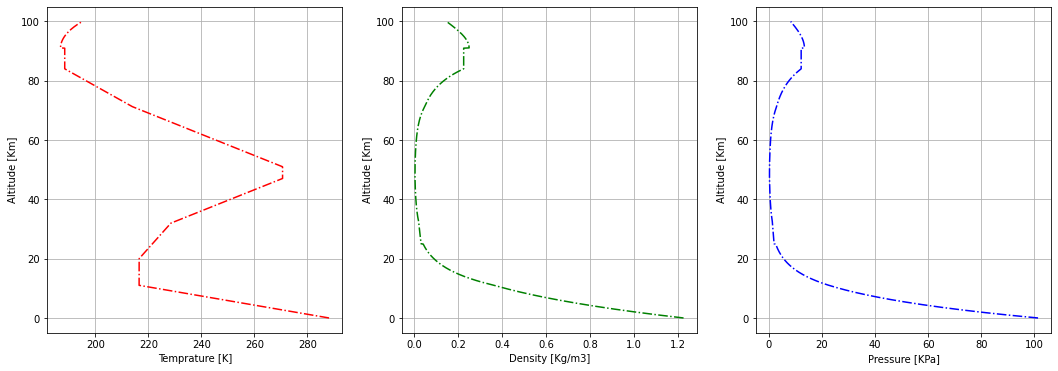

In [7]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.plot(T,H,"-.r");plt.grid();plt.xlabel("Temprature [K]");plt.ylabel("Altitude [Km]");
plt.subplot(1,3,2);
plt.plot(Rho,H,"-.g");plt.grid();plt.xlabel("Density [Kg/m3]");plt.ylabel("Altitude [Km]");
plt.subplot(1,3,3);
plt.plot(P,H,"-.b");plt.grid();plt.xlabel("Pressure [KPa]");plt.ylabel("Altitude [Km]");